<a href="https://colab.research.google.com/github/pradnyaakolkar/Health-risk-prediction-model-/blob/main/Traffic_Accident_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # optional for quick EDA
from google.colab import drive
import os

# Display settings
pd.set_option('display.max_columns', None)

In [4]:
# Check if the drive is already mounted
if not os.path.ismount('/content/drive'):
   drive.mount('/content/drive')
else:
   print("Drive is already mounted")


Mounted at /content/drive


In [6]:
# Step 2: Load Data
# Replace 'data/traffic_accidents.csv' with your dataset path
data_path = 'data/traffic_accidents.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AccidentsBig[1].csv')
df.head()

/tmp/ipython-input-4111486421.py:4: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AccidentsBig[1].csv')


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,E09000020,3.0,3218.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,E09000020,4.0,450.0,3.0,30.0,6.0,2.0,5.0,0.0,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,E09000020,5.0,0.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,E09000020,3.0,3220.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,E09000020,6.0,0.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


In [7]:
# Step 3: Data Cleaning
# Check for missing values
df.info()
df.isnull().sum()

# Example: Fill or drop missing values
# df['column'] = df['column'].fillna(value)
# df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               59998 non-null  float64
 1   longitude                                    59998 non-null  float64
 2   latitude                                     59998 non-null  float64
 3   Police_Force                                 59998 non-null  float64
 4   Accident_Severity                            59998 non-null  float64
 5   Number_of_Vehicles                           59998 non-null  float64
 6   Number_of_Casualties                         59998 non-null  float64
 7   Day_of_Week                                  59998 non-null  float64
 8   Time                                         59997 non-null  object 
 9   Local_Authority_(District)                   59998 non-null  float64

,0
Accident_Index,988577
longitude,988577
latitude,988577
Police_Force,988577
Accident_Severity,988577
Number_of_Vehicles,988577
Number_of_Casualties,988577
Day_of_Week,988577
Time,988578
Local_Authority_(District),988577


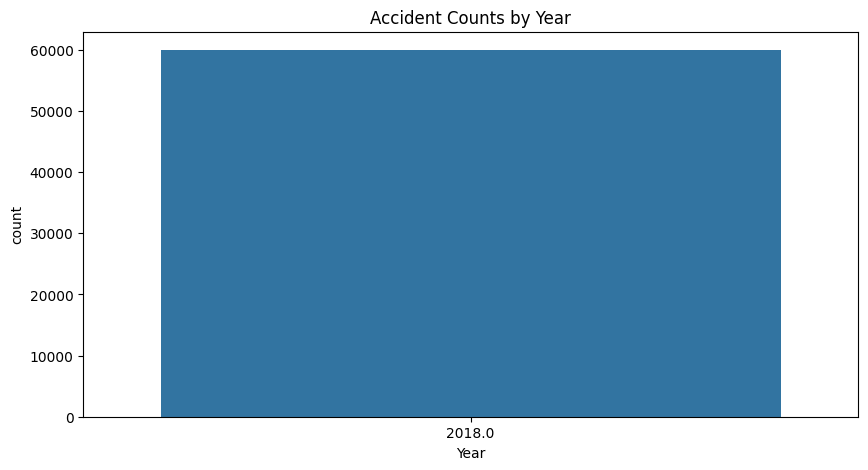

In [9]:
# Step 4: Exploratory Data Analysis
# Convert 'Date' column to datetime objects and extract the year
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=df)
plt.title('Accident Counts by Year')
plt.show()

# Add more plots: state-wise analysis, time-of-day trends

In [10]:
# Step 5: Feature Engineering (Optional)
# Example: Create time-of-day groups
# df['Hour'] = pd.to_datetime(df['Time']).dt.hour
# df['TimeOfDay'] = pd.cut(df['Hour'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])

In [12]:
# Step 6: Export Cleaned Data for Power BI
import os
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True) # Create directory if it doesn't exist
df.to_csv(os.path.join(output_dir, 'traffic_accidents_cleaned.csv'), index=False)